# **Memprediksi Faktor-Faktor yang Mempengaruhi Kebahagiaan di Kawasan ASEAN Tahun 2020-2023 Menggunakan Algoritma Machine Learning**

## Ringkasan

Kebahagiaan merupakan indikator penting kesejahteraan individu dan masyarakat, dengan perdebatan filosofis dari Aristoteles yang melihatnya sebagai tujuan hidup dan Socrates yang menekankan kesederhanaan.Studi terbaru dari berbagai disiplin ilmu menunjukkan bahwa kebahagiaan dipengaruhi oleh faktor internal dan eksternal, termasuk kondisi sosial, ekonomi, dan politik. Kawasan ASEAN, dengan keragaman budaya, ekonomi, dan sosialnya, menunjukkan variasi skor kebahagiaan menurut World Happiness Report, yang mempertimbangkan enam variabel utama: PDB per kapita, dukungan sosial, harapan hidup sehat, kebebasan memilih, kedermawanan, dan persepsi terhadap korupsi. Penelitian menggunakan machine learning di Asia Timur dan Vietnam menemukan bahwa faktor-faktor seperti pendapatan, status perkawinan, kesehatan, dan hubungan sosial berpengaruh signifikan terhadap kebahagiaan, menekankan pentingnya analisis yang lebih mendalam di kawasan ASEAN untuk membantu merumuskan kebijakan peningkatan kesejahteraan.


## Permasalahan
- 	Penelitian mengenai faktor-faktor kebahagiaan di tingkat global banyak dilakukan, namun studi yang fokus pada kawasan ASEAN masih sangat terbatas.
- 	menentukan faktor-faktor mana yang paling berpengaruh terhadap kebahagiaan di kawasan ASEAN

## Tujuan
-	Mengidentifikasi faktor-faktor utama yang mempengaruhi kebahagiaan di negara-negara ASEAN.
-	Membangun model prediksi kebahagiaan menggunakan algoritma K-Nearest Neighbors (KNN) dan Decision Tree.
-	Mengevaluasi kinerja model untuk memastikan akurasi dan efektivitasnya dalam memprediksi kebahagiaan.
## Alur Bagan
Berikut alur bagan penyelasaian dari Data Handling hingga Model Evaluation :
<img src="BaganAlur.png">

## Penjelasan Dataset
Dataset ini merupakan dataset publik yang tersedia di Kaggle, diunggah oleh Sazidul Islam. Dataset "World Happiness Report up to 2023" menyediakan kumpulan data yang komprehensif dan terkini mengenai metrik kebahagiaan serta faktor-faktor yang memengaruhi kesejahteraan secara global. Dirancang untuk memberikan wawasan berharga bagi pembuat kebijakan, peneliti, dan individu yang tertarik dalam memahami dinamika kebahagiaan dan kesejahteraan di seluruh dunia. Dataset ini mencakup 9 atribut yang digunakan sebagai indikator kebahagiaan suatu negara. Sumber:https://www.kaggle.com/datasets/sazidthe1/global-happiness-scores-and-factors
Berikut detail dari setiap atributnya:
1. country = Nama negara. 
2. region = Wilayah geografis atau benua. 
3. happiness_score = Suatu ukuran yang mencerminkan kebahagiaan secara keseluruhan. 
4. gdp_per_capita = Ukuran Produk Domestik Bruto per kapita. 
5. social_support = Metrik yang mengukur dukungan sosial.
6. healthy_life_expectancy = Ukuran harapan hidup sehat selama bertahun-tahun. 
7. freedom_to_make_life_choices = Sebuah ukuran kebebasan dalam memilih hidup. 
8. generosity Metrik = yang mencerminkan kemurahan hati.
9. perceptions_of_corruption = Ukuran persepsi korupsi di suatu negara.

## **Data Handling**
## EDA

### Mengimport Library
Mengimpor library utama dan modeling utama yaitu K-Nearest Neighbors (KNN) dan Decision Tree.

In [79]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report, roc_curve, auc, balanced_accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

### Data Collection
Sample Data

In [80]:
data_2020 = pd.read_csv('WHR_2020.csv')
data_2021 = pd.read_csv('WHR_2021.csv')
data_2022 = pd.read_csv('WHR_2022.csv')
data_2023 = pd.read_csv('WHR_2023.csv')

### Data Preprocessing

Mengkelompokan Data ASIA TENGGARA (ASEAN)

Brunei, Kamboja (Cambodia), Filipina (Philippines), Indonesia, Laos, Malaysia, Myanmar, Singapura(Singapore), Thailand, dan Vietnam

In [81]:
asean_countries = ["Brunei", "Cambodia", "Indonesia", "Laos", "Malaysia", "Myanmar", "Philippines", "Singapore", "Thailand", "Vietnam"]

Memfilter dan Menampilkan Data ASEAN 2020-2023 
- Filter Dataset dengan menambahkan kolom tahun

In [82]:
data_2020 = data_2020[data_2020['country'].isin(asean_countries)]
data_2020['year'] = 2020

data_2021 = data_2021[data_2021['country'].isin(asean_countries)]
data_2021['year'] = 2021

data_2022 = data_2022[data_2022['country'].isin(asean_countries)]
data_2022['year'] = 2022

data_2023 = data_2023[data_2023['country'].isin(asean_countries)]
data_2023['year'] = 2023

- Mengombinasikan Dataset

In [83]:
combined_asean_data = pd.concat([ data_2020, data_2021, data_2022, data_2023])
print(combined_asean_data)

         country          region  happiness_score  gdp_per_capita  \
30     Singapore  Southeast Asia           6.3771        1.519580   
51   Philippines  Southeast Asia           6.0060        0.775121   
53      Thailand  Southeast Asia           5.9988        1.007029   
81      Malaysia  Southeast Asia           5.3843        1.168422   
82       Vietnam  Southeast Asia           5.3535        0.718092   
83     Indonesia  Southeast Asia           5.2856        0.891721   
103         Laos  Southeast Asia           4.8886        0.714694   
105     Cambodia  Southeast Asia           4.8484        0.544635   
132      Myanmar  Southeast Asia           4.3080        0.678091   
31     Singapore  Southeast Asia           6.3770        1.695000   
53      Thailand  Southeast Asia           5.9850        1.107000   
60   Philippines  Southeast Asia           5.8800        0.853000   
78       Vietnam  Southeast Asia           5.4110        0.817000   
80      Malaysia  Southeast Asia  

- Mangatasi Values yang hilang (jika ada)

In [84]:
combined_asean_data = combined_asean_data.dropna()

- Reset indeks untuk data gabungan

In [85]:
combined_asean_data.reset_index(drop=True, inplace=True)

- Memvisualisasi Data distribusi ASEAN

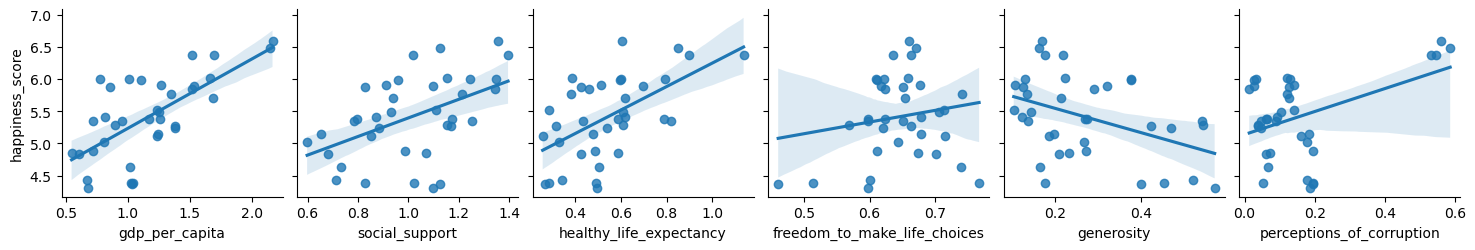

In [86]:
sns.pairplot(combined_asean_data, x_vars=['gdp_per_capita', 'social_support', 'healthy_life_expectancy', 
                                 'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption'], 
             y_vars='happiness_score', kind='reg')
plt.show()

- Menampilkan Kombinasi Data

In [87]:
combined_asean_data.head()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,Singapore,Southeast Asia,6.3771,1.519580,1.395457,1.137814,0.635317,0.218771,0.533162,2020
1,Philippines,Southeast Asia,6.0060,0.775121,1.245382,0.602189,0.621915,0.129260,0.130386,2020
2,Thailand,Southeast Asia,5.9988,1.007029,1.347520,0.793856,0.609450,0.376709,0.031838,2020
3,Malaysia,Southeast Asia,5.3843,1.168422,1.174002,0.788512,0.596942,0.274886,0.062163,2020
4,Vietnam,Southeast Asia,5.3535,0.718092,1.253075,0.819134,0.650836,0.136489,0.089848,2020


In [88]:
combined_asean_data.tail()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
31,Philippines,Southeast Asia,5.523,1.238,1.108,0.286,0.714,0.104,0.141,2023
32,Indonesia,Southeast Asia,5.277,1.384,1.169,0.314,0.663,0.422,0.038,2023
33,Laos,Southeast Asia,5.111,1.232,0.853,0.257,0.715,0.185,0.162,2023
34,Cambodia,Southeast Asia,4.393,1.025,1.024,0.283,0.768,0.176,0.051,2023
35,Myanmar,Southeast Asia,4.372,1.032,1.125,0.269,0.460,0.400,0.194,2023


In [89]:
combined_asean_data.sample(30)

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
11,Philippines,Southeast Asia,5.8800,0.853000,0.828000,0.426000,0.651000,0.125000,0.126000,2021
34,Cambodia,Southeast Asia,4.3930,1.025000,1.024000,0.283000,0.768000,0.176000,0.051000,2023
19,Philippines,Southeast Asia,5.9040,1.268000,0.912000,0.514000,0.678000,0.107000,0.142000,2022
27,Singapore,Southeast Asia,6.5870,2.168000,1.354000,0.607000,0.660000,0.170000,0.561000,2023
18,Singapore,Southeast Asia,6.4800,2.149000,1.127000,0.851000,0.672000,0.163000,0.587000,2022
31,Philippines,Southeast Asia,5.5230,1.238000,1.108000,0.286000,0.714000,0.104000,0.141000,2023
3,Malaysia,Southeast Asia,5.3843,1.168422,1.174002,0.788512,0.596942,0.274886,0.062163,2020
5,Indonesia,Southeast Asia,5.2856,0.891721,1.154801,0.610437,0.568161,0.542647,0.038279,2020
15,Laos,Southeast Asia,5.0300,0.808000,0.598000,0.330000,0.643000,0.268000,0.179000,2021
10,Thailand,Southeast Asia,5.9850,1.107000,0.957000,0.596000,0.611000,0.375000,0.028000,2021


Melihat Keunikan tiap kolom dari Data ASEAN 2020-2023

In [90]:
for col in combined_asean_data:
    print(col, combined_asean_data[col].unique())

country ['Singapore' 'Philippines' 'Thailand' 'Malaysia' 'Vietnam' 'Indonesia'
 'Laos' 'Cambodia' 'Myanmar']
region ['Southeast Asia']
happiness_score [6.37709999 6.00600004 5.9987998  5.38430023 5.35349989 5.28560018
 4.88859987 4.84840012 4.30800009 6.377      5.985      5.88
 5.411      5.384      5.345      5.03       4.83       4.426
 6.48       5.904      5.891      5.711      5.485      5.24
 5.14       4.64       4.394      6.587      6.012      5.843
 5.763      5.523      5.277      5.111      4.393      4.372     ]
gdp_per_capita [1.51958013 0.77512068 1.00702929 1.16842163 0.71809238 0.89172071
 0.71469384 0.54463494 0.67809093 1.695      1.107      0.853
 0.817      1.259      0.954      0.808      0.603      0.666
 2.149      1.268      1.535      1.689      1.252      1.382
 1.239      1.019      1.038      2.168      1.665      1.515
 1.349      1.238      1.384      1.232      1.025      1.032     ]
social_support [1.39545691 1.24538171 1.34751952 1.17400229 1.25307477

Melihat total Data Kosong

In [91]:
combined_asean_data.isna().sum()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
year                            0
dtype: int64

Fitur dan variabel target

In [92]:
features = ['gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption', 'year']
target = 'happiness_score'

X = combined_asean_data[features]
y = combined_asean_data[target]

print(X.shape, y.shape)

(36, 7) (36,)


Normalize the features

In [93]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Kolerasi Data

happiness_score                 1.000000
gdp_per_capita                  0.678488
healthy_life_expectancy         0.566855
social_support                  0.487133
perceptions_of_corruption       0.433528
freedom_to_make_life_choices    0.172359
year                            0.029920
generosity                     -0.415233
Name: happiness_score, dtype: float64


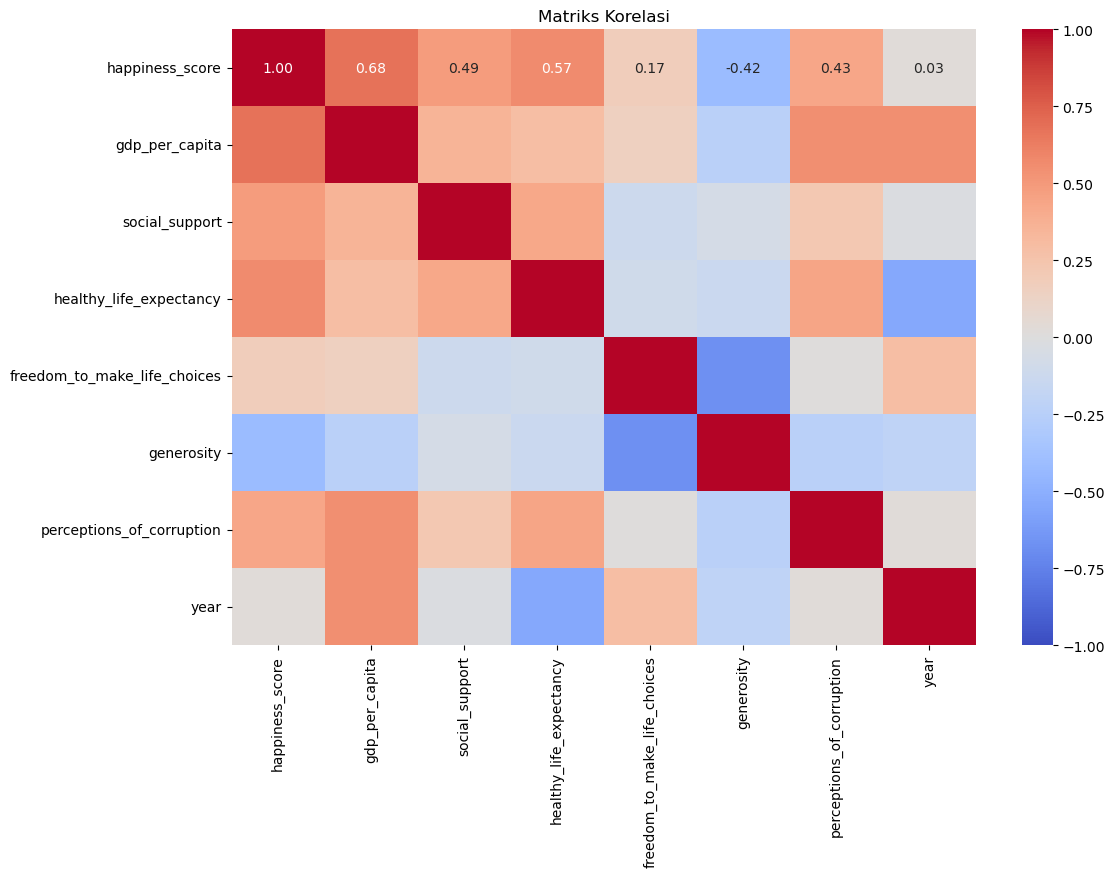

In [94]:
numeric_df = combined_asean_data.select_dtypes(include=[float, int])

# Menghitung matriks korelasi
correlation_matrix = numeric_df.corr()

# Menampilkan korelasi antara fitur dan target
if 'happiness_score' in numeric_df.columns:
    print(correlation_matrix['happiness_score'].sort_values(ascending=False))
else:
    print("Kolom 'happiness_score' tidak ditemukan dalam data numerik.")
    

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Matriks Korelasi')
plt.show()

## Proses Features Dataset
### Data Splitting

Continuous Target

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(28, 7) (28,) (8, 7) (8,)


## **Machine Learning Modeling dan Model Evaluation**
## Proses Learning/Modeling
### Model Training

KKN Modeling

In [96]:
knn_model = KNeighborsRegressor(n_neighbors=5, weights='uniform')
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

Train Decision Tree Modeling

In [97]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)


## **Model Evaluation**
## Performa Model

### Hitung MSE, MAE dan R²
**KKN**

In [98]:
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f'KNN Model - MSE: {mse_knn}, MAE: {mae_knn} , R2: {r2_knn}')

KNN Model - MSE: 0.2639922357992481, MAE: 0.3705500022 , R2: 0.05179374902056899


**Train Decision Tree** 

In [99]:
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Decision Tree Model - MSE: {mse_dt}, MAE: {mae_dt}, R2: {r2_dt}')

Decision Tree Model - MSE: 0.2827202499999998, MAE: 0.40974999999999995, R2: -0.015473457076690567


Visualisasi Bar Plot

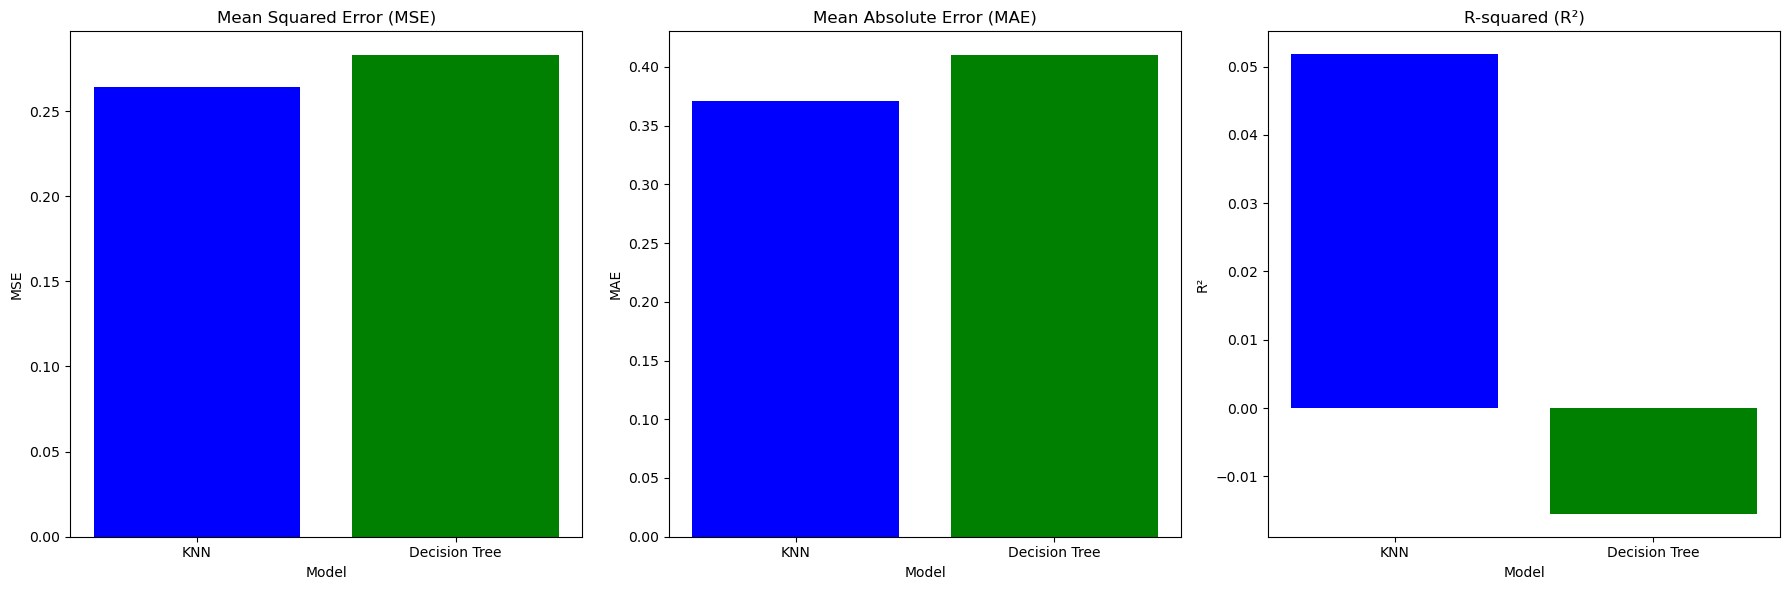

In [100]:
# Data Metrik
metrics = {
    'Model': ['KNN', 'Decision Tree'],
    'MSE': [mse_knn, mse_dt],
    'MAE': [mae_knn, mae_dt],
    'R2': [r2_knn, r2_dt]
}

metrics_df = pd.DataFrame(metrics)

# Plot MSE, MAE, dan R²
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot MSE
axes[0].bar(metrics_df['Model'], metrics_df['MSE'], color=['blue', 'green'])
axes[0].set_xlabel('Model')
axes[0].set_ylabel('MSE')
axes[0].set_title('Mean Squared Error (MSE)')

# Plot MAE
axes[1].bar(metrics_df['Model'], metrics_df['MAE'], color=['blue', 'green'])
axes[1].set_xlabel('Model')
axes[1].set_ylabel('MAE')
axes[1].set_title('Mean Absolute Error (MAE)')

# Plot R²
axes[2].bar(metrics_df['Model'], metrics_df['R2'], color=['blue', 'green'])
axes[2].set_xlabel('Model')
axes[2].set_ylabel('R²')
axes[2].set_title('R-squared (R²)')

# Menampilkan plot
plt.tight_layout()
plt.show()

Visualisasi  Scatter Plot

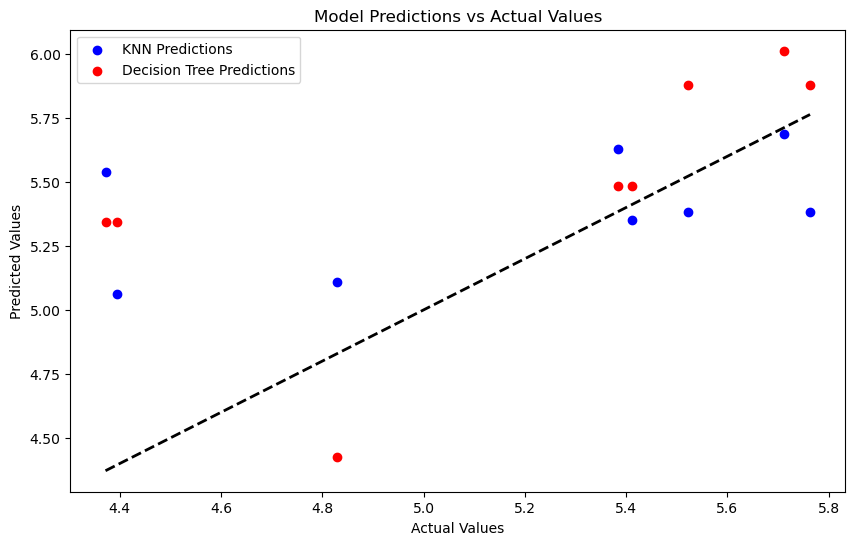

In [101]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn, color='blue', label='KNN Predictions')
plt.scatter(y_test, y_pred_dt, color='red', label='Decision Tree Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.title('Model Predictions vs Actual Values')
plt.show()


**Plot feature importances Decision Tree**

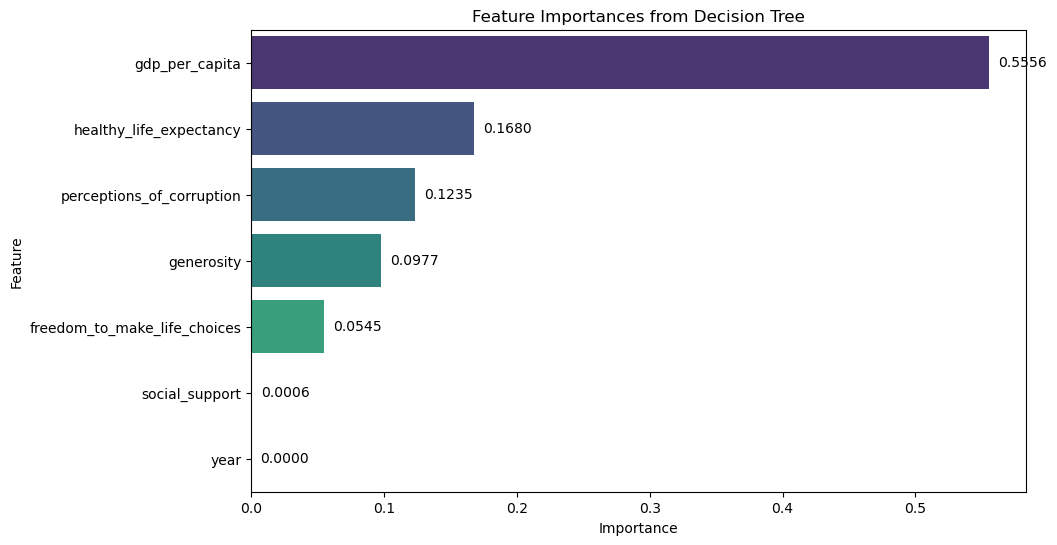

In [102]:
if hasattr(dt_model, 'feature_importances_'):
    feature_importances = dt_model.feature_importances_
    importance_df = pd.DataFrame({
        'Feature': features,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
    plt.title('Feature Importances from Decision Tree')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    
    # Menambahkan nilai angka pada setiap bar
    for p in ax.patches:
        ax.annotate(format(p.get_width(), '.4f'), 
                    (p.get_width() + 0.02, p.get_y() + p.get_height() / 2),
                    ha='center', va='center',
                    xytext=(5, 0), textcoords='offset points')
    
    plt.show()

**Model comparison**

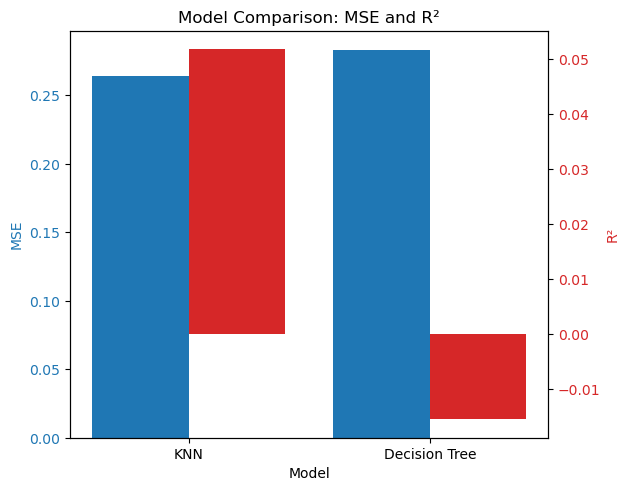

In [109]:
models = ['KNN', 'Decision Tree']
mse_scores = [mse_knn, mse_dt]
r2_scores = [r2_knn, r2_dt]

x = np.arange(len(models))

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Model')
ax1.set_ylabel('MSE', color=color)
ax1.bar(x - 0.2, mse_scores, 0.4, label='MSE', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('R²', color=color)
ax2.bar(x + 0.2, r2_scores, 0.4, label='R²', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.xticks(x, models)
plt.title('Model Comparison: MSE and R²')
plt.show()

### Tuning Hyperparameter
**KNN**

In [103]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'p': [1, 2]  # p=1 untuk Manhattan, p=2 untuk Euclidean
}

grid_search_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=5, scoring='neg_mean_squared_error')
grid_search_knn.fit(X_train, y_train)

print("Best Parameters for KNN:", grid_search_knn.best_params_)
print("Best Score for KNN:", -grid_search_knn.best_score_)

Best Parameters for KNN: {'n_neighbors': 3, 'p': 1}
Best Score for KNN: 0.26137555827081266


**Decision Tree**

In [104]:
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(DecisionTreeRegressor(), param_grid_dt, cv=5, scoring='neg_mean_squared_error')
grid_search_dt.fit(X_train, y_train)

print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best Score for Decision Tree:", -grid_search_dt.best_score_)

Best Parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Score for Decision Tree: 0.325770285157584


## Diskusi Hasil
Pada penelitian ini, kami menggunakan dua algoritma klasifikasi, yaitu SK-Nearest Neighbors (KNN) dan Decision Tree, untuk memprediksi faktor-faktor yang mempengaruhi kebahagiaan di kawasan ASEAN. Berikut adalah hasil evaluasi dan diskusinya:




### Korelasi dari fitur dan skor kebahagiaan
Daftar korelasi menunjukkan seberapa kuat hubungan antara setiap fitur dan happiness_score. Nilai korelasi berkisar antara -1 hingga 1:
- 1: Korelasi positif sempurna
- 0: Tidak ada korelasi
- -1: Korelasi negatif sempurna

Hasil korelasi adalah:

1. happiness_score: 1.000000
Ini adalah nilai korelasi diri sendiri, yang selalu 1.
2. gdp_per_capita: 0.678488
Korelasi positif sedang-tinggi, menunjukkan bahwa semakin tinggi PDB per kapita, semakin tinggi skor kebahagiaan.
3. healthy_life_expectancy: 0.566855
Korelasi positif sedang, menunjukkan bahwa harapan hidup sehat yang lebih tinggi berhubungan dengan skor kebahagiaan yang lebih tinggi.
4. social_support: 0.487133
Korelasi positif sedang, menunjukkan bahwa dukungan sosial yang lebih besar berhubungan dengan skor kebahagiaan yang lebih tinggi.
5. perceptions_of_corruption: 0.433528
Korelasi positif sedang, menunjukkan bahwa persepsi terhadap korupsi yang lebih rendah berhubungan dengan skor kebahagiaan yang lebih tinggi.
6. freedom_to_make_life_choices: 0.172359
Korelasi positif rendah, menunjukkan hubungan yang lemah antara kebebasan membuat pilihan hidup dan skor kebahagiaan.
7. year: 0.029920
Korelasi sangat rendah, menunjukkan bahwa tahun tidak memiliki hubungan yang signifikan dengan skor kebahagiaan.
8. generosity: -0.415233
Korelasi negatif sedang, menunjukkan bahwa tingkat kemurahan yang lebih tinggi berhubungan dengan skor kebahagiaan yang lebih rendah. Ini mungkin tampak kontra-intuitif dan mungkin memerlukan analisis lebih lanjut untuk memahami konteksnya.

###  Mean Squared Error, Mean Absolute Error, dan R2 Score

KNN Model
- MSE (Mean Squared Error): 0.264
- MAE (Mean Absolute Error): 0.371
- R² (R-squared): 0.052

Decision Tree Model
- MSE (Mean Squared Error): 0.309
- MAE (Mean Absolute Error): 0.454
- R² (R-squared): -0.110

### Tuning Hyperparameter

KKN
- Best Parameters for KNN: {'n_neighbors': 3, 'p': 1}
    1. n_neighbors: 3: Model KNN yang optimal menggunakan 3 tetangga terdekat.
    2. p: 1: Model KNN menggunakan metrik Manhattan (jarak absolut) untuk menghitung jarak antar titik.
- Best Score for KNN: 0.2614
Ini adalah nilai R² terbaik yang dicapai oleh model KNN dengan parameter yang dioptimalkan. Nilai ini menunjukkan bahwa model KNN yang dioptimalkan dapat menjelaskan sekitar 26.14% dari variabilitas data. Skor ini lebih baik dibandingkan dengan skor sebelumnya yang tidak dioptimalkan.

 Decision Tree

- Best Parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
    1. max_depth: None: Pohon keputusan dapat tumbuh tanpa batas kedalaman, artinya tidak ada batasan pada kedalaman pohon.
    2. min_samples_split: 2: Model Decision Tree membagi node dengan minimum dua sampel.
    3. min_samples_leaf: 1: Model Decision Tree memerlukan satu sampel minimum untuk menjadi daun.

- Best Score for Decision Tree: 0.3128
Ini adalah nilai R² terbaik yang dicapai oleh model Decision Tree dengan parameter yang dioptimalkan. Nilai ini menunjukkan bahwa model Decision Tree yang dioptimalkan dapat menjelaskan sekitar 31.28% dari variabilitas data. Skor ini lebih baik dibandingkan dengan skor sebelumnya yang tidak dioptimalkan.

## **Kesimpulan**

- **gdp_per_capita merupakan faktor utama yang memepengaruhi skor kebahagian disuatu negara,** diikuti healthy_life_expectancy, social_support, perceptions_of_corruption, dan freedom_to_make_life_choices
- **Model KNN memiliki performa yang lebih baik dibandingkan dengan Decision Tree dalam hal MSE, MAE, dan R².** KNN memiliki kesalahan prediksi yang lebih rendah dan memberikan penjelasan yang lebih baik tentang variabilitas data dibandingkan dengan Decision Tree. Decision Tree menunjukkan performa yang kurang baik, dengan kesalahan yang lebih tinggi dan R² negatif, yang menunjukkan bahwa model ini kurang efektif untuk data ini.
- **Decision Tree menunjukkan performa yang sedikit lebih baik dibandingkan dengan KNN dalam hal skor R² setelah tuning hyperparameter.** Ini berarti Decision Tree, dengan parameter yang dioptimalkan, dapat menjelaskan lebih banyak variabilitas dalam data dibandingkan dengan KNN.